In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection, sklearn.linear_model, sklearn.svm, sklearn.metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC

# Importing Databases

In [4]:
df = pd.read_csv('voice.csv')

In [5]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [6]:
df.tail()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,...,0.165509,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.546875,0.350000,female


In [7]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

# Data Pre-Processing

# Checking for Null Values

In [9]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

# Encoding Lables from string to boolean values

In [10]:
df.replace(to_replace="male", value=1, inplace=True)
df.replace(to_replace="female", value=0, inplace=True)
df.label.unique()

array([1, 0], dtype=int64)

# Splitting data for training and testing

In [11]:
xData=df.iloc[:,:-1]
yData=df.iloc[:,-1]
xData.shape, yData.shape

((3168, 20), (3168,))

In [12]:
TRAINSPLIT = 0.8

xTrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(xData, yData, train_size=TRAINSPLIT)
xTrain.shape, yTrain.shape

((2534, 20), (2534,))

# Exploratory Data-Analysis

# Distribution of lables

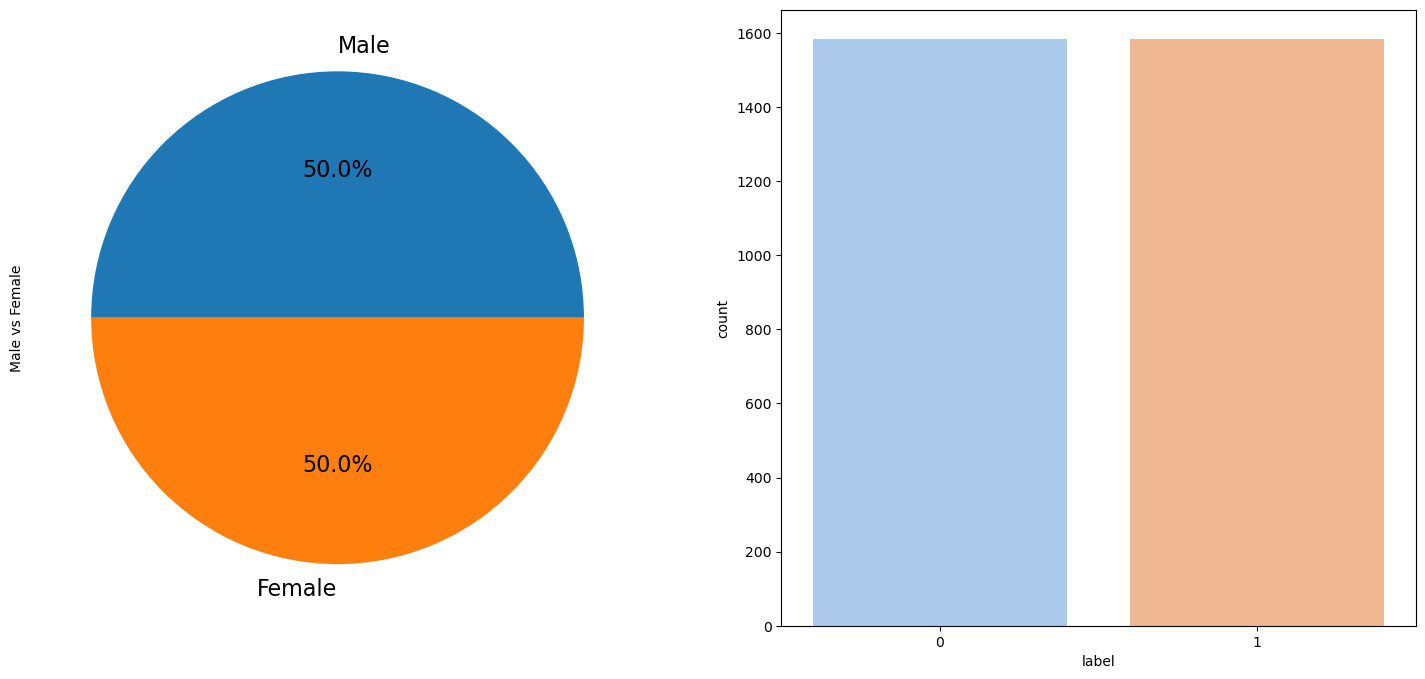

In [13]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
df.label.value_counts().plot(kind="pie",
                                           fontsize=16,
                                           labels=["Male", "Female"],
                                           ylabel="Male vs Female",
                                           autopct='%1.1f%%');

plt.subplot(1, 2, 2)
sns.countplot(x="label",data=df, palette="pastel")
plt.show()

# Correlation Coefficient

The correlation coefficient is a statistical measure of the strength of the relationship between the relative movements
of two variables. The values range between -1.0 and 1.0. A calculated number greater than 1.0 or less than -1.0 means that
there was an error in the correlation measurement. A correlation of -1.0 shows a perfect negative correlation, while a
correlation of 1.0 shows a perfect positive correlation. A correlation of 0.0 shows no linear relationship between the 
movement of the two variables.

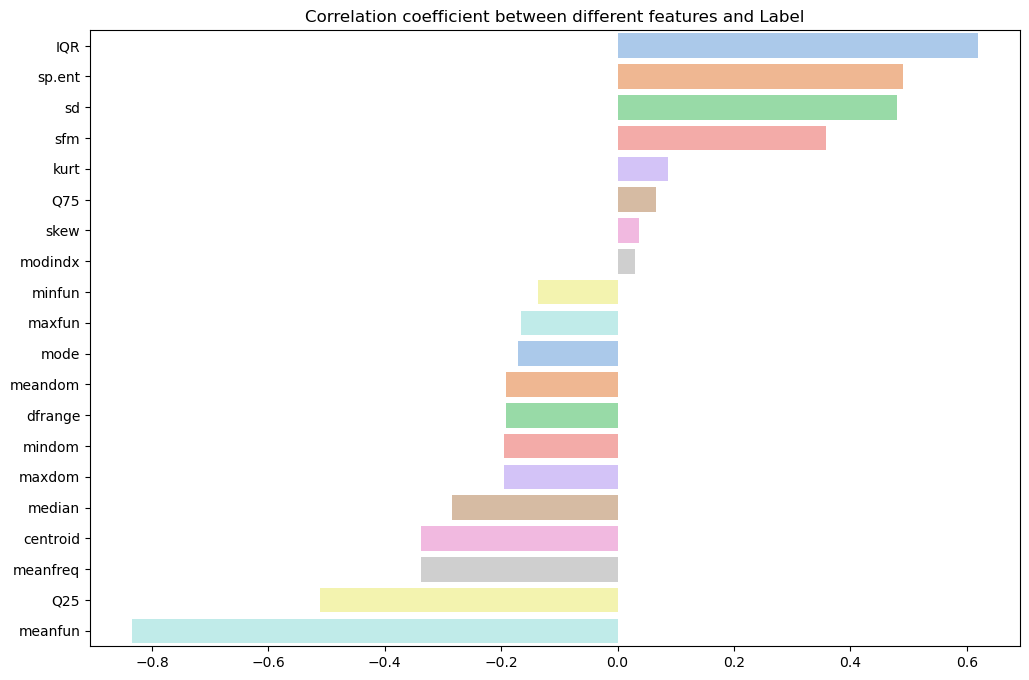

In [14]:
plt.figure(figsize=(12,8))
data = df.corr()["label"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    labels.append(indices[i])
    corr.append(data[i])
sns.barplot(x=corr, y=labels, palette='pastel')
plt.title('Correlation coefficient between different features and Label')
plt.show()

# Distribution of meanfun in our Data

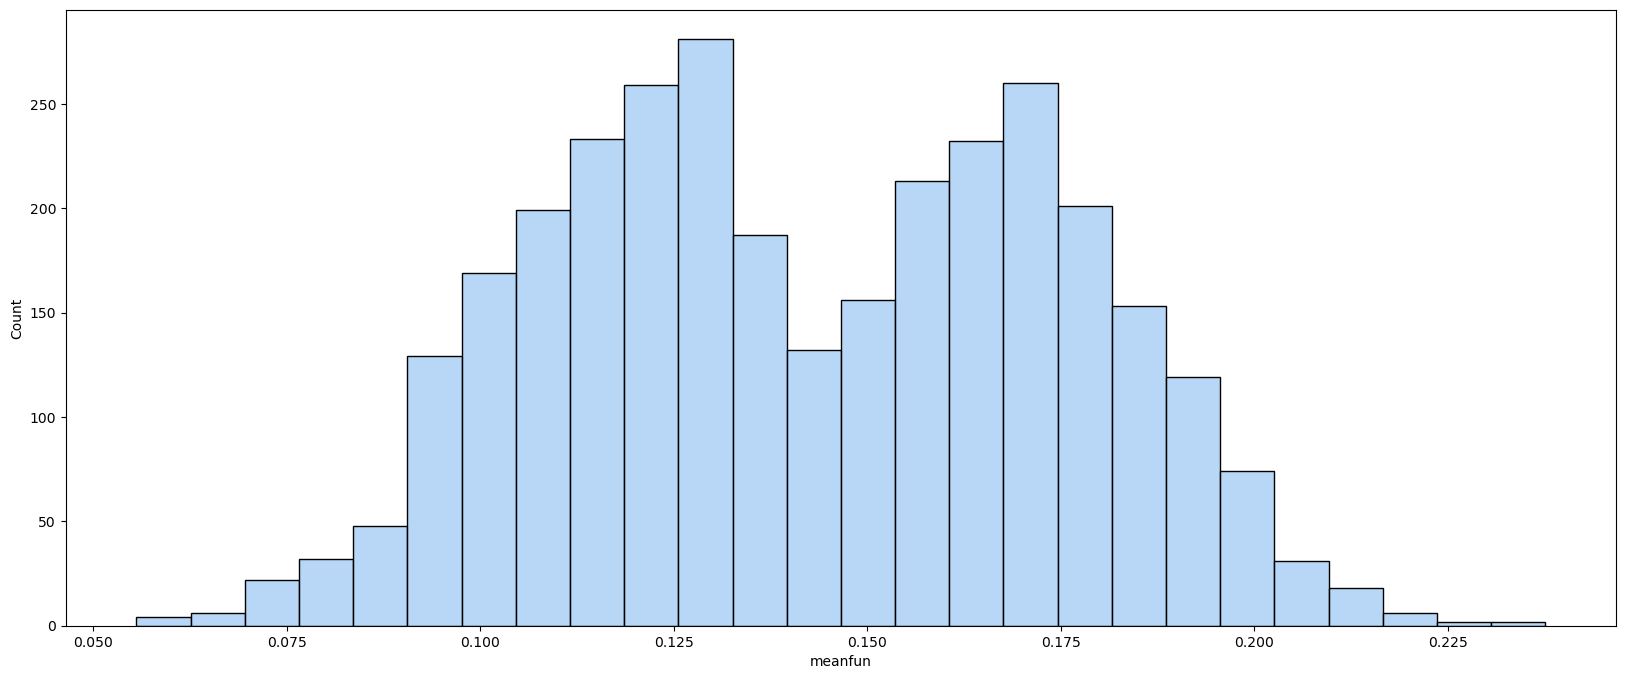

In [15]:
plt.figure(figsize=(20,8))
sns.histplot(df.meanfun, color=sns.color_palette('pastel')[0])
plt.show()

# Logistic Regression

In [16]:
regressionModel = LogisticRegression(solver='liblinear')
regressionModel.fit(xTrain,yTrain)
regressionModel.score(xTest, yTest)

0.9022082018927445

# The K-nearest neighbours

In [17]:
KNNModel = KNeighborsClassifier(n_neighbors=3)
KNNModel.fit(xTrain,yTrain)
KNNModel.score(xTest, yTest)

0.7192429022082019

# Support Vector Classifier

In [18]:
svmLinearModel=sklearn.svm.SVC(kernel='linear',C=10)
svmLinearModel.fit(xTrain,yTrain)
svmLinearModel.score(xTest, yTest)

0.9684542586750788

In [19]:
svmRbfModel=sklearn.svm.SVC(kernel='rbf',C=10)
svmRbfModel.fit(xTrain,yTrain)
svmRbfModel.score(xTest, yTest)

0.694006309148265

In [20]:
svmPolyModel=sklearn.svm.SVC(kernel='poly',C=10000)
svmPolyModel.fit(xTrain,yTrain)
svmPolyModel.score(xTest, yTest)

0.6309148264984227

# Random forest classifier

In [21]:
randomFModel = RandomForestClassifier()
randomFModel.fit(xTrain, yTrain)
randomFModel.score(xTest, yTest)

0.9794952681388013

# Decision tree classifier

In [22]:
dTreeModel = DecisionTreeClassifier()
dTreeModel.fit(xTrain, yTrain)
dTreeModel.score(xTest, yTest)

0.9637223974763407

# Gaussian Process classifier

In [23]:
gpcModel = GaussianProcessClassifier()
gpcModel.fit(xTrain, yTrain)
gpcModel.score(xTest, yTest)

0.7318611987381703

# Performance analysis of Different models

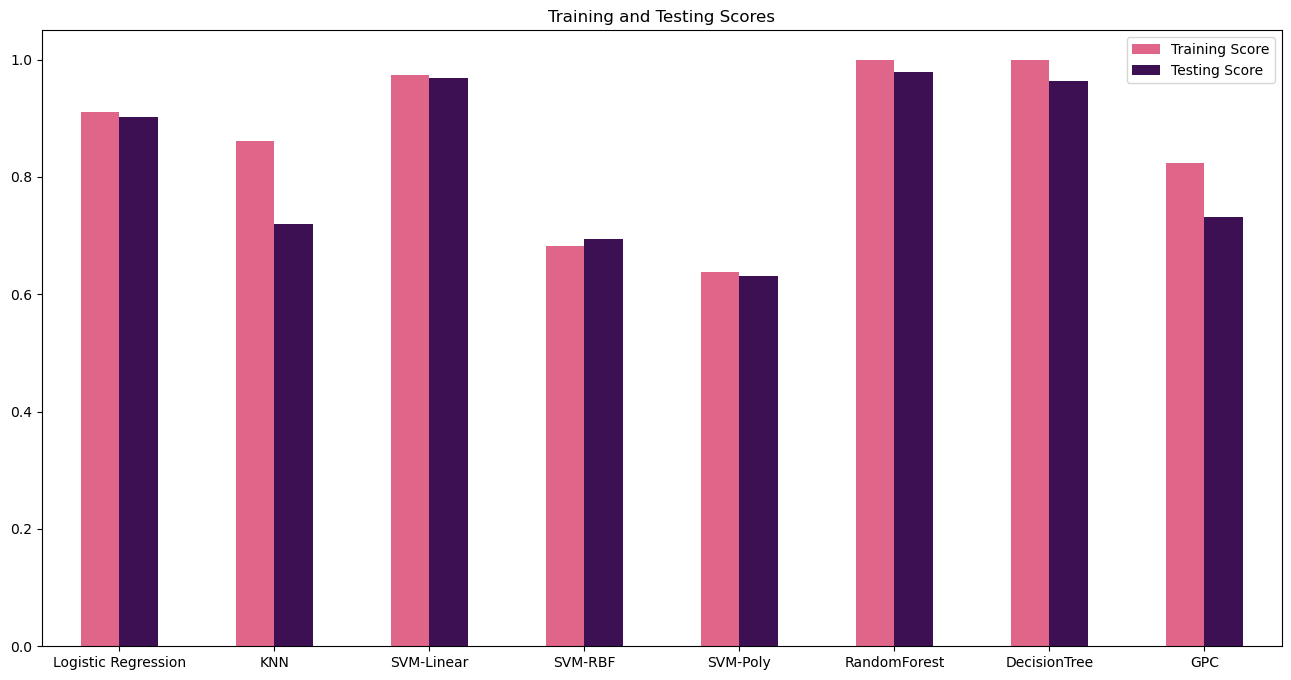

In [24]:
trainScores = [regressionModel.score(xTrain, yTrain), KNNModel.score(xTrain, yTrain), svmLinearModel.score(xTrain, yTrain), svmRbfModel.score(xTrain, yTrain),svmPolyModel.score(xTrain, yTrain), randomFModel.score(xTrain,yTrain), dTreeModel.score(xTrain,yTrain), gpcModel.score(xTrain, yTrain)]
testScores = [regressionModel.score(xTest, yTest), KNNModel.score(xTest, yTest), svmLinearModel.score(xTest, yTest), svmRbfModel.score(xTest, yTest),svmPolyModel.score(xTest, yTest), randomFModel.score(xTest,yTest), dTreeModel.score(xTest,yTest), gpcModel.score(xTest, yTest)]
indices = ['Logistic Regression', 'KNN', 'SVM-Linear', 'SVM-RBF','SVM-Poly', 'RandomForest', 'DecisionTree', 'GPC']
scores = pd.DataFrame({'Training Score': trainScores,'Testing Score': testScores}, index=indices)
plot = scores.plot.bar(figsize=(16, 8), rot=0, color=['#df6589ff', '#3c1053ff'])
plt.title('Training and Testing Scores')
plt.show()

In [25]:
scores

,Training Score,Testing Score
Logistic Regression,0.910418,0.902208
KNN,0.860695,0.719243
SVM-Linear,0.973165,0.968454
SVM-RBF,0.681926,0.694006
SVM-Poly,0.638516,0.630915
RandomForest,1.000000,0.979495
DecisionTree,1.000000,0.963722
GPC,0.823994,0.731861


# Confusion Matrices

In [26]:
predRegression = regressionModel.predict(xTest)
predSVMLinear = svmLinearModel.predict(xTest)
predSVMRbf = svmRbfModel.predict(xTest)
predKNN = KNNModel.predict(xTest)
predSVMPoly = svmPolyModel.predict(xTest)
predRandomF = randomFModel.predict(xTest)
predDTree = dTreeModel.predict(xTest)
predGPC = gpcModel.predict(xTest)
predVals = pd.DataFrame(data={'truth': yTest, 'regression': predRegression, 'knn': predKNN, 'svm-linear': predSVMLinear, 'svm-rbf': predSVMRbf, 'svm-poly': predSVMPoly, 'random-forest': predRandomF, 'decision-tree': predDTree, 'GPC': predGPC})

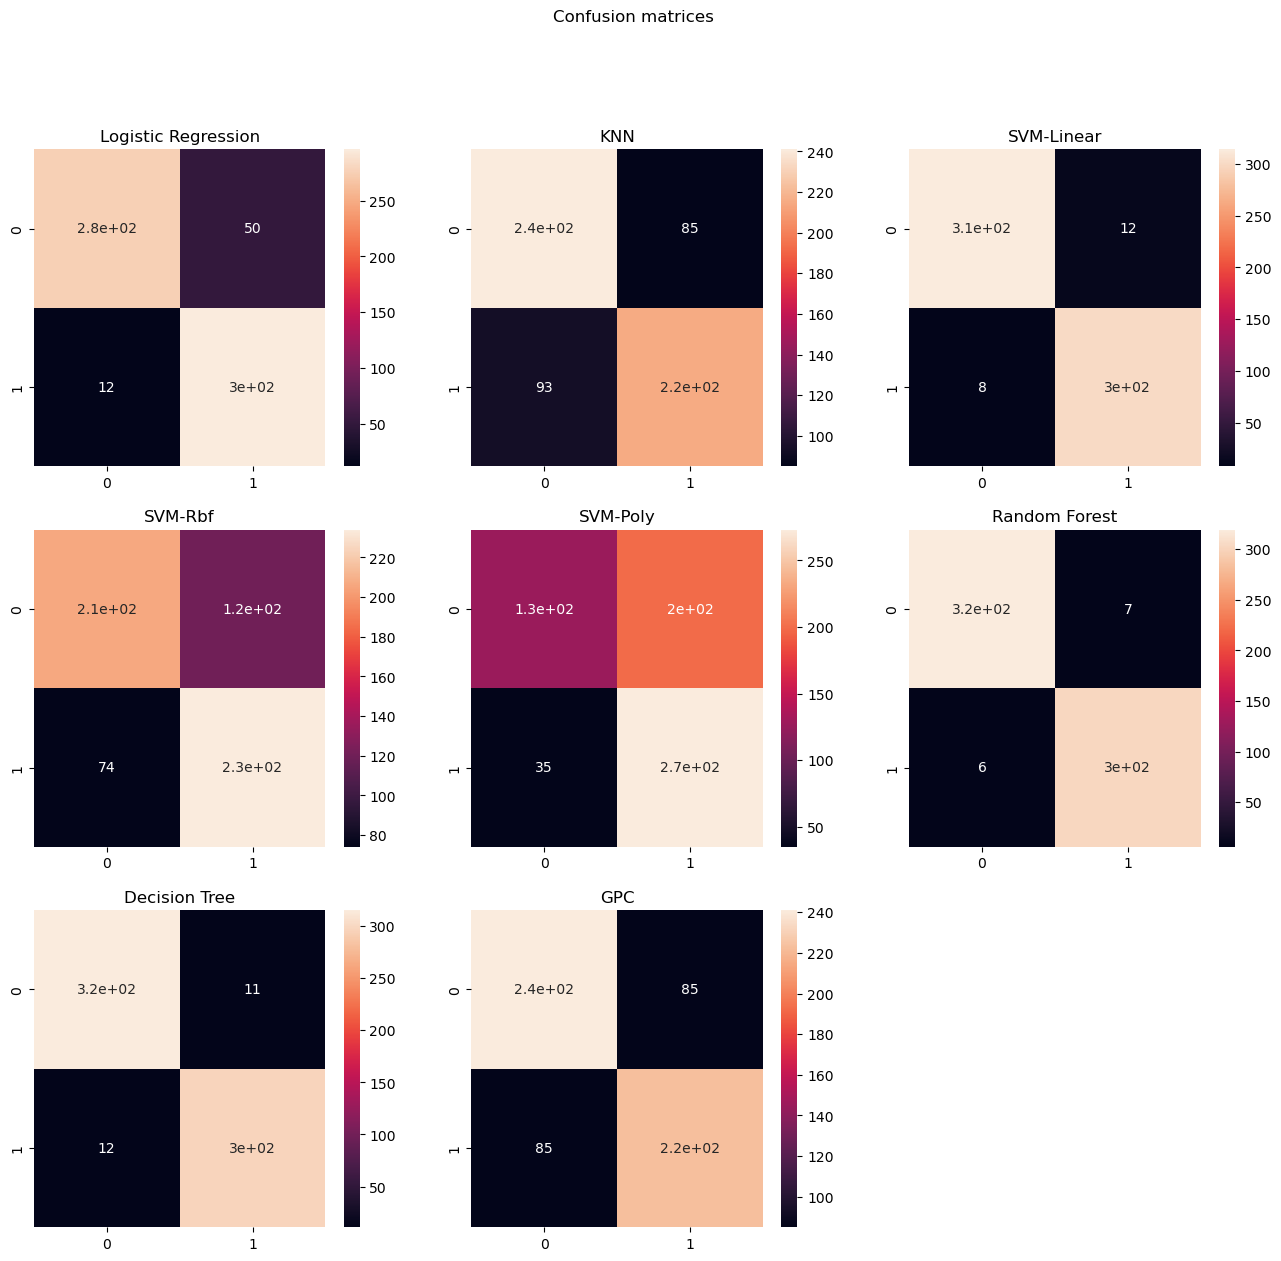

In [27]:
plt.figure(figsize=(16, 14))
plt.subplot(3, 3, 1)
sns.heatmap(sklearn.metrics.confusion_matrix(yTest, predRegression), annot=True).set(title='Logistic Regression')
plt.subplot(3, 3, 2)
sns.heatmap(sklearn.metrics.confusion_matrix(yTest, predKNN), annot=True).set(title='KNN')
plt.subplot(3, 3, 3)
sns.heatmap(sklearn.metrics.confusion_matrix(yTest, predSVMLinear), annot=True).set(title='SVM-Linear')
plt.subplot(3, 3, 4)
sns.heatmap(sklearn.metrics.confusion_matrix(yTest, predSVMRbf), annot=True).set(title='SVM-Rbf')
plt.subplot(3, 3, 5)
sns.heatmap(sklearn.metrics.confusion_matrix(yTest, predSVMPoly), annot=True).set(title='SVM-Poly')
plt.subplot(3, 3, 6)
sns.heatmap(sklearn.metrics.confusion_matrix(yTest, predRandomF), annot=True).set(title='Random Forest')
plt.subplot(3, 3, 7)
sns.heatmap(sklearn.metrics.confusion_matrix(yTest, predDTree), annot=True).set(title='Decision Tree')
plt.subplot(3, 3, 8)
sns.heatmap(sklearn.metrics.confusion_matrix(yTest, predGPC), annot=True).set(title='GPC')
plt.suptitle('Confusion matrices')
plt.show()

# Classification report

In [28]:
print("Logistic Regression:\n\n", sklearn.metrics.classification_report(yTest, predRegression))

Logistic Regression:

               precision    recall  f1-score   support

           0       0.96      0.85      0.90       326
           1       0.86      0.96      0.91       308

    accuracy                           0.90       634
   macro avg       0.91      0.90      0.90       634
weighted avg       0.91      0.90      0.90       634



In [29]:
print("KNN:\n\n", sklearn.metrics.classification_report(yTest, predKNN))

KNN:

               precision    recall  f1-score   support

           0       0.72      0.74      0.73       326
           1       0.72      0.70      0.71       308

    accuracy                           0.72       634
   macro avg       0.72      0.72      0.72       634
weighted avg       0.72      0.72      0.72       634



In [30]:
print("SVM with linear kernel:\n\n", sklearn.metrics.classification_report(yTest, predSVMLinear))

SVM with linear kernel:

               precision    recall  f1-score   support

           0       0.98      0.96      0.97       326
           1       0.96      0.97      0.97       308

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [31]:
print("SVM with RBF kernel:\n\n", sklearn.metrics.classification_report(yTest, predSVMRbf))

SVM with RBF kernel:

               precision    recall  f1-score   support

           0       0.74      0.63      0.68       326
           1       0.66      0.76      0.71       308

    accuracy                           0.69       634
   macro avg       0.70      0.70      0.69       634
weighted avg       0.70      0.69      0.69       634



In [32]:
print("SVM with poly kernel:\n\n", sklearn.metrics.classification_report(yTest, predSVMPoly))

SVM with poly kernel:

               precision    recall  f1-score   support

           0       0.78      0.39      0.52       326
           1       0.58      0.89      0.70       308

    accuracy                           0.63       634
   macro avg       0.68      0.64      0.61       634
weighted avg       0.68      0.63      0.61       634



In [33]:
print("Random Forest:\n\n", sklearn.metrics.classification_report(yTest, predRandomF))

Random Forest:

               precision    recall  f1-score   support

           0       0.98      0.98      0.98       326
           1       0.98      0.98      0.98       308

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [34]:
print("Decision Tree:\n\n", sklearn.metrics.classification_report(yTest, predDTree))

Decision Tree:

               precision    recall  f1-score   support

           0       0.96      0.97      0.96       326
           1       0.96      0.96      0.96       308

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



In [35]:
print("Decision Tree:\n\n", sklearn.metrics.classification_report(yTest, predGPC))

Decision Tree:

               precision    recall  f1-score   support

           0       0.74      0.74      0.74       326
           1       0.72      0.72      0.72       308

    accuracy                           0.73       634
   macro avg       0.73      0.73      0.73       634
weighted avg       0.73      0.73      0.73       634



# Prediction

In [36]:
predVals.head()

,truth,regression,knn,svm-linear,svm-rbf,svm-poly,random-forest,decision-tree,GPC
2864,0,0,1,0,1,1,0,0,1
712,1,1,1,1,1,1,1,1,1
437,1,1,1,1,1,1,1,1,1
2343,0,0,0,0,0,1,0,0,0
2877,0,0,0,0,0,0,0,0,0


# RandomForestClassifier has the highest Accuracy,Precision and Recall.